# Chapter 12 - The Linear Regression

## Listing 12-1. Importing the data and plotting it

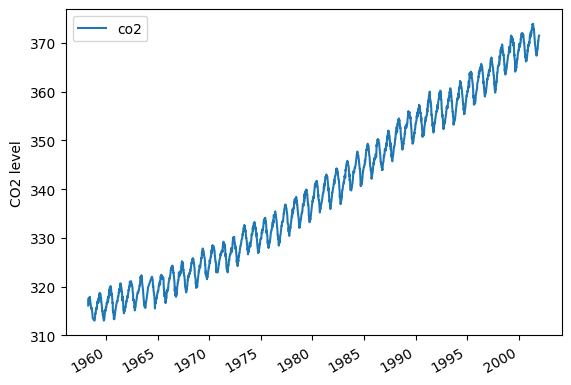

In [2]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

data = sm.datasets.co2.load_pandas()
co2 = data.data
co2 = co2.dropna()
ax = co2.plot()
ax.set_ylabel('CO2 level')
plt.show()


## Listing 12-2. Creating the variable month

In [3]:
co2['month'] = [x.month for x in co2.index] 

/var/folders/5z/nxlf2r4n5yx6qy1wbzvkr3xr0000gn/T/ipykernel_29352/27764350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2['month'] = [x.month for x in co2.index]


## Listing 12-3. Creating the variable year

In [4]:
co2['year'] = [x.year for x in co2.index] 

/var/folders/5z/nxlf2r4n5yx6qy1wbzvkr3xr0000gn/T/ipykernel_29352/3206968955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2['year'] = [x.year for x in co2.index]


## Listing 12-4. Fitting a Linear Regression with two variables

2025/05/27 12:41:54 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/05/27 12:42:03 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/05/27 12:42:03 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '0b1081c72f28430d8429acd765768f26', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/05/27 12:42:03 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/envs/chapter12-15/lib/python3.9/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (

0.969052891089224 0.34332512339516574


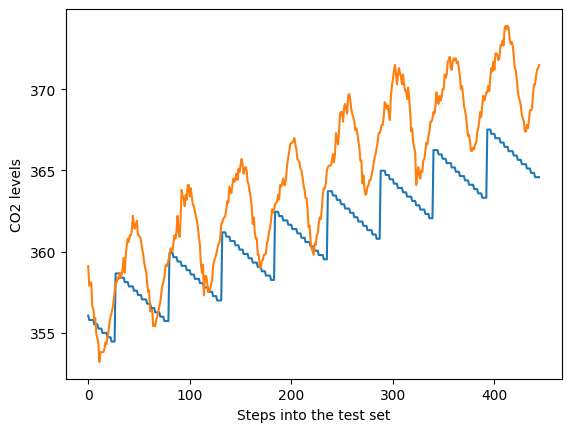

In [6]:
import mlflow
mlflow.autolog()

# Create X and y objects
X = co2[['year', 'month']]
y = co2['co2']

# Create Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345,shuffle=False)

# Fit model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

print(train_r2, test_r2)

# Plot result
plt.plot(list(test_fcst))
plt.plot(list(y_test))
plt.xlabel('Steps into the test set')
plt.ylabel('CO2 levels')
plt.show()


## Listing 12-4. Adding lagged variables into the data

In [7]:
co2['co2_l1'] = co2['co2'].shift(1)
co2['co2_l2'] = co2['co2'].shift(2)
co2['co2_l3'] = co2['co2'].shift(3)
co2['co2_l4'] = co2['co2'].shift(4)
co2['co2_l5'] = co2['co2'].shift(5)


/var/folders/5z/nxlf2r4n5yx6qy1wbzvkr3xr0000gn/T/ipykernel_29352/3081521428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2['co2_l1'] = co2['co2'].shift(1)
/var/folders/5z/nxlf2r4n5yx6qy1wbzvkr3xr0000gn/T/ipykernel_29352/3081521428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2['co2_l2'] = co2['co2'].shift(2)
/var/folders/5z/nxlf2r4n5yx6qy1wbzvkr3xr0000gn/T/ipykernel_29352/3081521428.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

## Listing 12-5. Drop missing values

In [8]:
co2 = co2.dropna()

## Listing 12-6. Fitting the full Linear Regression model

2025/05/27 12:43:13 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '017fd3cc3a2c4d23af77639d79d8a54f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/05/27 12:43:13 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/envs/chapter12-15/lib/python3.9/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Mi

0.998797756425323 0.9904370120462794


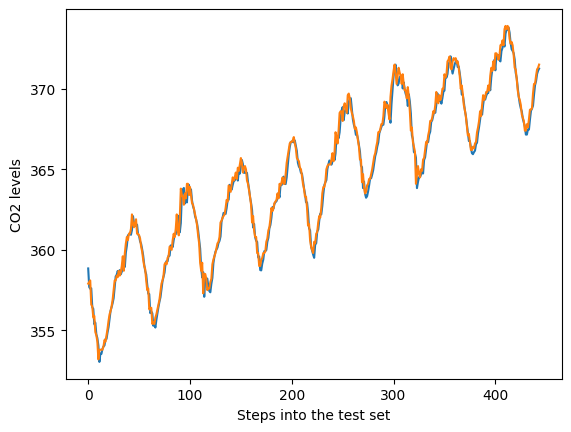

In [9]:
# Create X and y objects
X = co2[['year', 'month', 'co2_l1', 'co2_l2', 'co2_l3', 'co2_l4', 'co2_l5']]
y = co2['co2']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345,shuffle=False)

# Fit the model
my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

print(train_r2, test_r2)

# Plot result
plt.plot(list(test_fcst))
plt.plot(list(y_test))
plt.xlabel('Steps into the test set')
plt.ylabel('CO2 levels')
plt.show()
